<a href="https://colab.research.google.com/github/Haizhepi/MLCheatSheet/blob/master/ANN3_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('drive/My Drive/DATA/cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


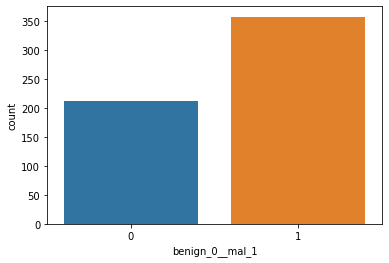

In [6]:
sns.countplot(x='benign_0__mal_1', data=df)

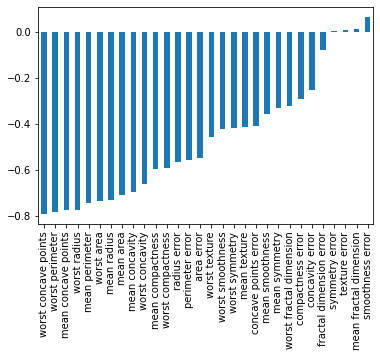

In [9]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

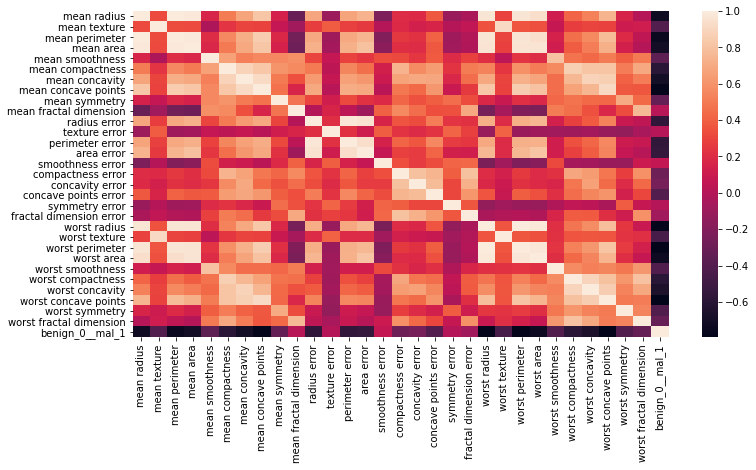

In [11]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr())

In [13]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
from tensorflow.keras.models import Sequential

In [21]:
from tensorflow.keras.layers import Dense, Dropout

In [22]:
X_train.shape

(426, 30)

In [25]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

In [27]:
losses = pd.DataFrame(model.history.history)

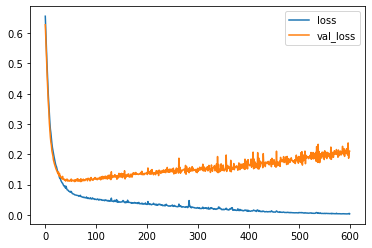

In [29]:
losses.plot()

In [34]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

In [38]:
model_loss = pd.DataFrame(model.history.history)

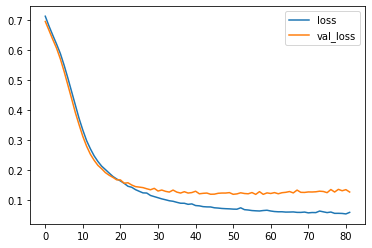

In [39]:
model_loss.plot()

In [40]:
from tensorflow.keras.layers import Dropout

In [41]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [42]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.7102 - val_loss: 0.6876
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6836 - val_loss: 0.6706
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6763 - val_loss: 0.6576
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6557 - val_loss: 0.6448
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6480 - val_loss: 0.6290
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6381 - val_loss: 0.6095
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6176 - val_loss: 0.5910
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6164 - val_loss: 0.5640
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5841 - val_loss: 0.5351
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5643 - val_loss: 0.5007
Epoch 11/

In [43]:
model_loss = pd.DataFrame(model.history.history)

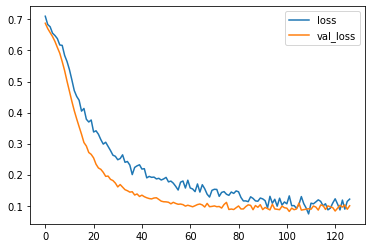

In [44]:
model_loss.plot()

In [49]:
predictions = model.predict_classes(X_test)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [52]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 3 85]]
